<a href="https://colab.research.google.com/github/anik-ghosh-au7/bitcoin_notifier/blob/master/Bitcoin_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Time series Analysis is done on a set of observations taken at specified times usually at equal intervals, it is maily used to predict the future values based on the previous observed values.

*   In this case, the data set contains the closing price of Bitcoin from 01-01-2017 till 20-03-2020, the data from 2017 is taken into consideration  because it's when bitcoin gained most popularity and most people started trading in it, also the data is taken at regular intervals on a daily basis.

*   Time Series is also widely used to understand the past behaviour, evaluate current performance to plan future actions accordingly.

*   Stationarity is a very important concept in Time Series Ananlysis, in order to implement time series we require the data to be stationary, i.e it should have a constant mean, constant variance and auto-covariance (i.e no correlation in between values of different time stamps).

*   Stationarity is what that defines that, if a time series has a particular behaviour over time, there's a very high probablility that it will folow the same in future.

    importing required packages to run this program
  
      *   numpy to transform our data into multi-dimensional array object
      *   pandas for data analysis & manipulation
      *   matplotlib for data visualization


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6

    
    *   importing data from my google drive using read_csv() function from pandas
    *   parse strings to datetimeformat, here we have set our data day wise
    *   setting data with date as the index variable



In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BTC-USD.csv")
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date'])

    
    *   importing datatime
    *   printing the first 10 data of the dataset

In [3]:
from datetime import  datetime
indexedDataset.head(10)

,Close
Date,
2017-01-01,998.325012
2017-01-02,1021.750000
2017-01-03,1043.839966
2017-01-04,1154.729980
2017-01-05,1013.380005
2017-01-06,902.200989
2017-01-07,908.585022
2017-01-08,911.198975
2017-01-09,902.828003


    
    *   plotted a graph between price and date of the above dataset to see the trend and stationarity of the data



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


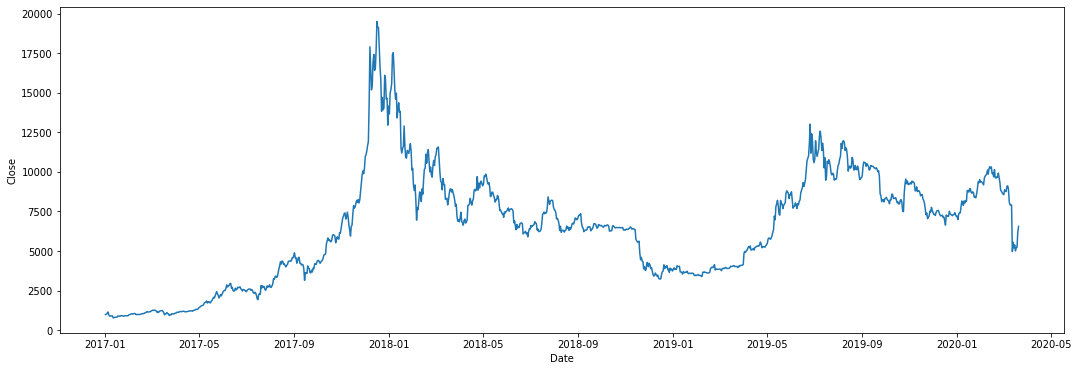

In [4]:
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(indexedDataset)

#### The Rolling Statistics test (to check the stationarity of the data) : 

In this we plot the moving average (rolling mean) and moving variance (rolling standard deviation) and see how it changes with time, it's more of a visual technique. Window of 365 means it has calculated the average of the first 365 days and given it to the 366th day similarly in the next step it will start from 2nd day to 366th day, average it out and give it to 367th day and so on.

In [5]:
rolmean = indexedDataset.rolling(window=365).mean()
rolstd = indexedDataset.rolling(window=365).std()
print(rolmean, rolstd)

                  Close
Date                   
2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
...                 ...
2020-03-16  8420.497792
2020-03-17  8423.766620
2020-03-18  8426.964560
2020-03-19  8432.728167
2020-03-20  8439.664004

[1175 rows x 1 columns]                   Close
Date                   
2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
...                 ...
2020-03-16  1943.812110
2020-03-17  1937.405391
2020-03-18  1931.154421
2020-03-19  1921.281541
2020-03-20  1909.877231

[1175 rows x 1 columns]


    plotted a graph with the following datasets
  
      *   original indexed dataset
      *   rolling mean dataset
      *   rolling standard deviation data set


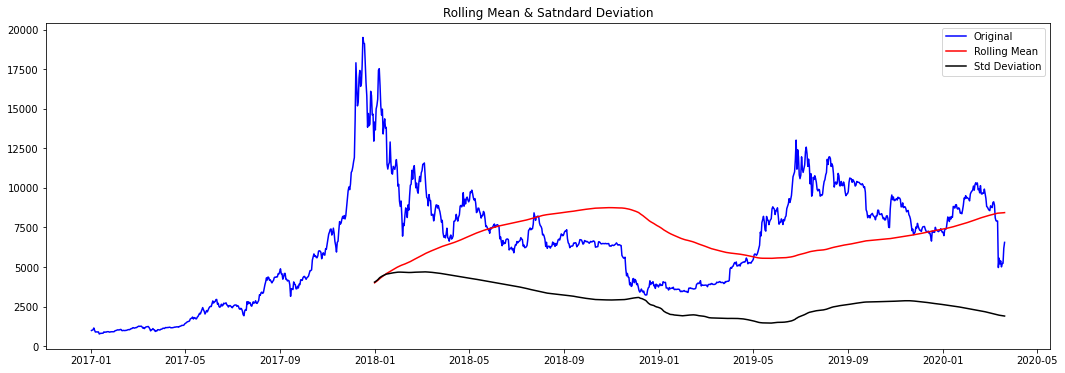

In [6]:
org = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Satndard Deviation')
plt.show(block=False)

#### ADF or Agumented Dickey Fuller Test (to check the stationarity of the data) : 

Here we have the null hypothesis that the Time Series is non stationary, the results of the test once performed will comprise of a test statistic and some critical values for different confidence levels. If the test statistic is less than the critical values then we can reject the null hypothesis and say the data is stationary, if not then it's not stationary.

    to perform Dickey Fuller test,
  
      *   importing adfuller from predefined python library statsmodels.tsa.stattools
      *   called the adfuller function and passed the closing price column of the dataset as an argument and mentioned the automatic determination of the lag is AIC i.e the Akaike information criterion which simply defines what we want from the time series wheter the actual value or the exact value and it nalyzes from the differerence in between them, there are some others like Bayesian information criterion (BIC), etc 
      *   the function will return us the following values, Test Statistic, p-value, Lags Used, Number of Observations Used and Critical values
      *   here we can see the critical values is less than the test statistics, so we can't reject the null hypothesis and the data is non stationary


In [7]:
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test :")
dftest = adfuller(indexedDataset['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Result of Dickey-Fuller Test :
Test Statistic                   -2.541349
p-value                           0.105735
#Lags Used                       20.000000
Number of Observations Used    1154.000000
Critical Value (1%)              -3.436029
Critical Value (5%)              -2.864048
Critical Value (10%)             -2.568105
dtype: float64


    estimating the trend,
  
      *   taken a log of the indexed data set i.e our original data to transform the values in a smaller Y scale


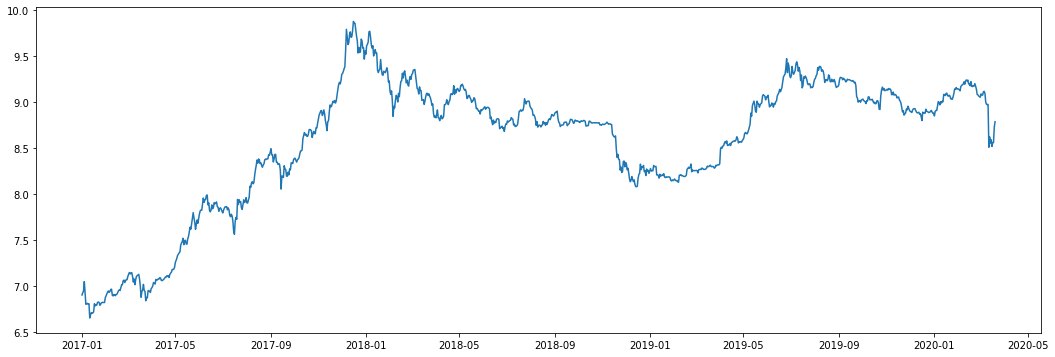

In [8]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


      calculating the moving or running average & standard deviation


In [9]:
movingAverage = indexedDataset_logScale.rolling(window=365).mean()
movingStd = indexedDataset_logScale.rolling(window=365).std()
print(rolmean, rolstd)

                  Close
Date                   
2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
...                 ...
2020-03-16  8420.497792
2020-03-17  8423.766620
2020-03-18  8426.964560
2020-03-19  8432.728167
2020-03-20  8439.664004

[1175 rows x 1 columns]                   Close
Date                   
2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
...                 ...
2020-03-16  1943.812110
2020-03-17  1937.405391
2020-03-18  1931.154421
2020-03-19  1921.281541
2020-03-20  1909.877231

[1175 rows x 1 columns]


    plotting the above datasets of indexed dataset, moving average & standard deviation, all in log scale

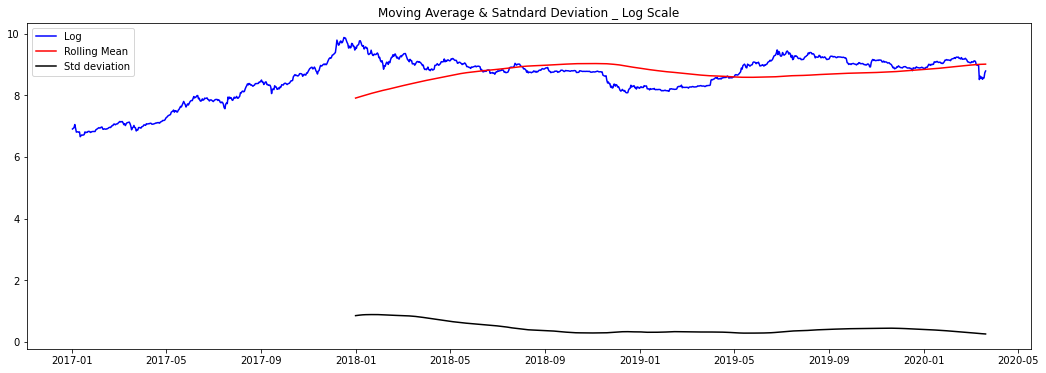

In [10]:
org_log = plt.plot(indexedDataset_logScale, color='blue', label='Log')
moving_average = plt.plot(movingAverage, color='red', label='Rolling Mean')
moving_std = plt.plot(movingStd, color='black', label='Std deviation')
plt.legend(loc='best')
plt.title('Moving Average & Satndard Deviation _ Log Scale')
plt.show(block=False)

    doing this to make our time data more stationary

In [11]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(10)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Close
Date,
2017-12-31,1.647537
2018-01-01,1.604470
2018-01-02,1.689702
2018-01-03,1.696869
2018-01-04,1.715595
2018-01-05,1.818746
2018-01-06,1.816196
2018-01-07,1.746516
2018-01-08,1.656136


    performing rolling statistics & adfuller test on the new dataset datasetLogScaleMinusMovingAverage which is the result of subtracting the moving average from the log scaled indexed dataset

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  movingAverage = timeSeries.rolling(window=365).mean()
  movingStd = timeSeries.rolling(window=365).std() 

  org = plt.plot(timeSeries, color='blue', label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingStd, color='black', label='Std Deviation')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Satndard Deviation')
  plt.show(block=False)

  print("Result of Dickey-Fuller Test :")
  dftest = adfuller(timeSeries['Close'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

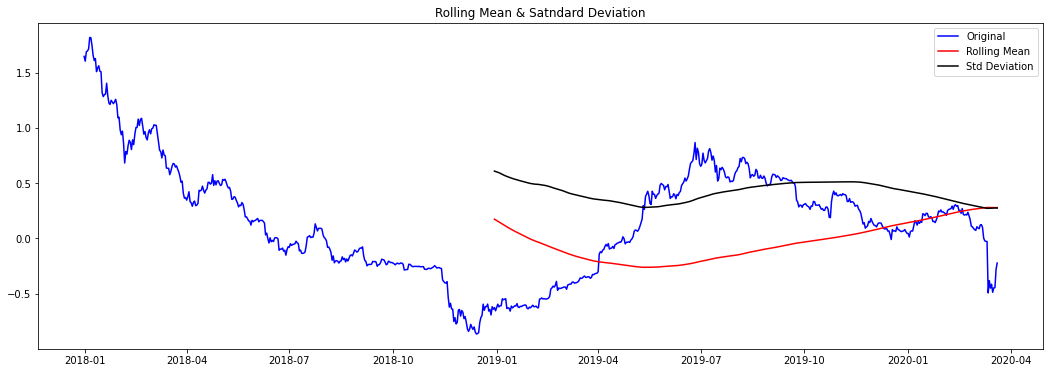

Result of Dickey-Fuller Test :
Test Statistic                  -3.066527
p-value                          0.029132
#Lags Used                       2.000000
Number of Observations Used    808.000000
Critical Value (1%)             -3.438469
Critical Value (5%)             -2.865124
Critical Value (10%)            -2.568678
dtype: float64


In [13]:
test_stationarity(datasetLogScaleMinusMovingAverage)

    above we can see the P value is relatively less and also the critical values are almost equal to the test statistic value, this helps to determine if the stationarity of the data

    here we are calculating the weighted average of the time series to get the trend

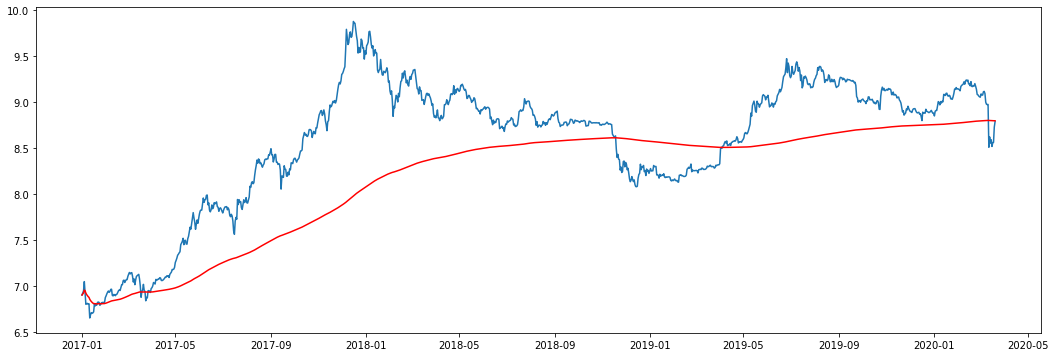

In [14]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=365, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

    previously we subtracted the simple mean from the log scale data set, in this transformation we will subtract the weighted mean and then check for the stationarity of the data

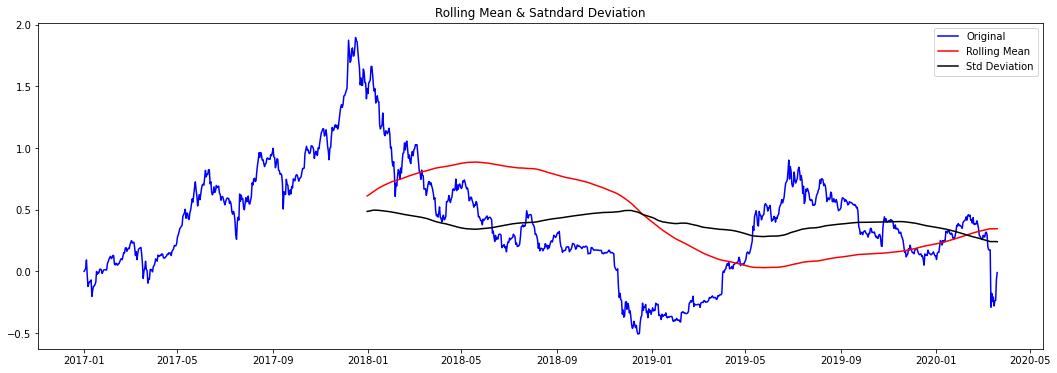

Result of Dickey-Fuller Test :
Test Statistic                   -1.698434
p-value                           0.431920
#Lags Used                        0.000000
Number of Observations Used    1174.000000
Critical Value (1%)              -3.435932
Critical Value (5%)              -2.864005
Critical Value (10%)             -2.568082
dtype: float64


In [15]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

    above we can see that the critical values are less than the test statistic but the P value is comparitively more than the previous one, so let's do another transformation

    previouly the mean value was subtracted from the actual value to do the transformation, now we will shift this values in the time series using the shift() function to be used for forecasting, here the value of lag is one or to say the time series is differentiated once, so this is the D value (I) of the ARIMA model that was discussed above

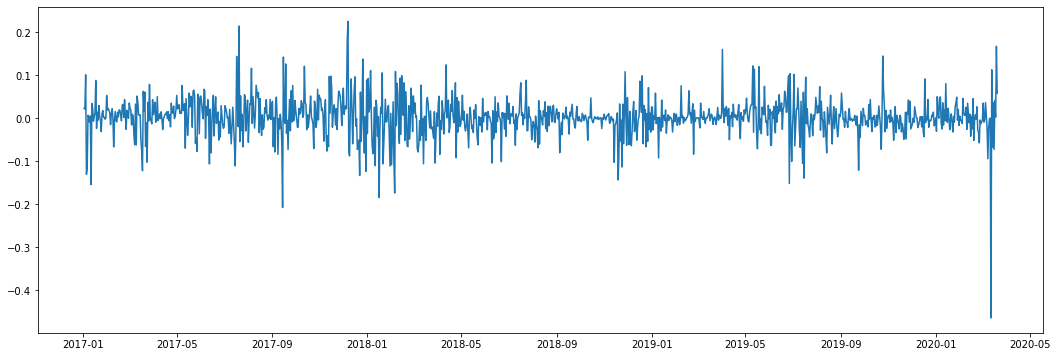

In [16]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

    dropping the NAN values and then testing the stationarity of the above time series data

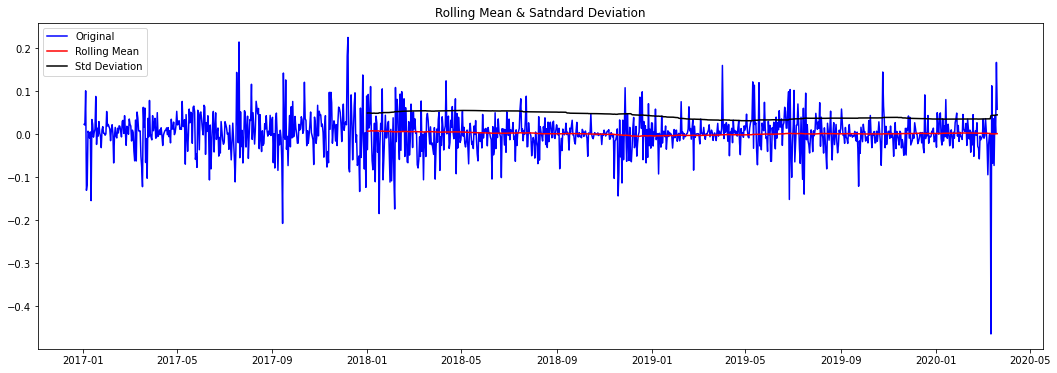

Result of Dickey-Fuller Test :
Test Statistic                  -23.247874
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1172.000000
Critical Value (1%)              -3.435942
Critical Value (5%)              -2.864009
Critical Value (10%)             -2.568085
dtype: float64


In [17]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

    here it can be clearly seen that in the test results of the output is almost flat and also looking at the p-value, test statistic and critical values we can safely reject the null hypothesis and say that the time series is stationary

Components of time series -


*   Trend : This could be interpreted as the general or average tendency of the data to increase or decrease over a long period.

*   Seasonality : This is the presence of variations that occur at specific regular intervals less than a year, it consistes of periodic, repetitive, and generally regular and predictable patterns in the levels of a time series.

*   Irregualrity : This component of a time series is the residual time series after the trend-cycle and the seasonal components have been removed. It corresponds to the high frequency fluctuations of the series.

*   Cyclic : This component comprises of the oscillatory movements of the time series with the period of time more than one year.



    
    *   to see the components of the time series lets import seasonal_decompose from statsmodels.tsa.seasonal, here the seasonal_decompose will segregate the data into three components i.e, the trend, seasonal & residual.
    *   plotting the graph for all the components



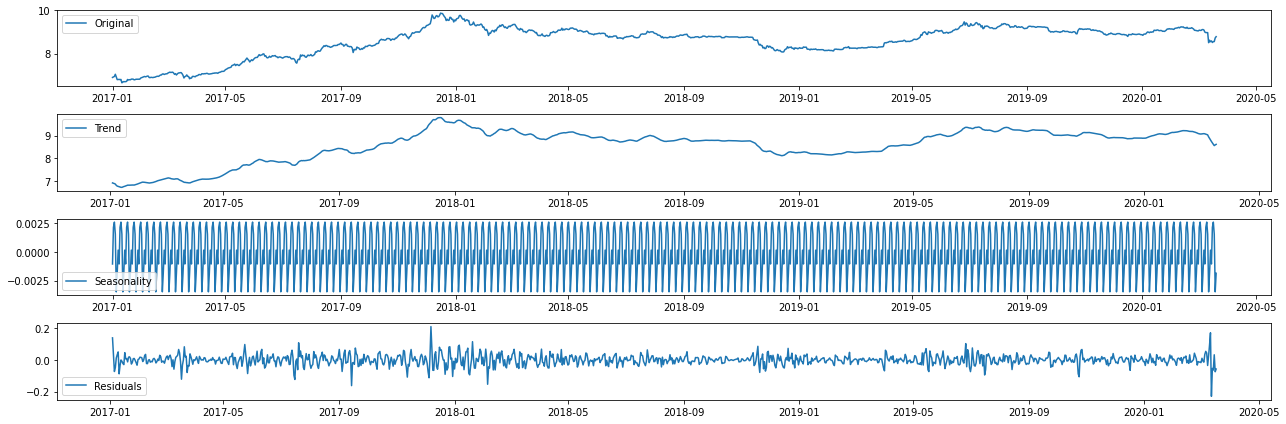

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

    checking the noise, to see if its stationary or not

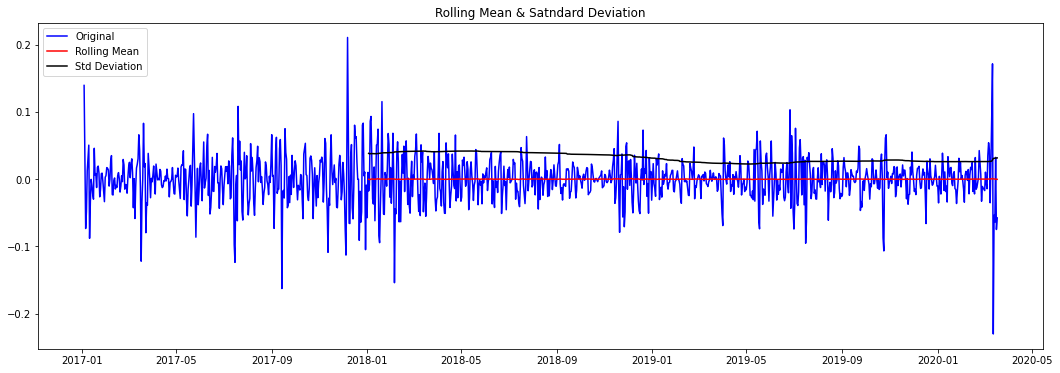

Result of Dickey-Fuller Test :
Test Statistic                -1.480136e+01
p-value                        2.097078e-27
#Lags Used                     1.500000e+01
Number of Observations Used    1.153000e+03
Critical Value (1%)           -3.436034e+00
Critical Value (5%)           -2.864050e+00
Critical Value (10%)          -2.568106e+00
dtype: float64


In [19]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

    previously the value of D was determined, now to get the values of P (AR) and Q (MA) we have to plot the PACF and ACF respectively. For PACF graph we have mentioned the method to be OLS i.e oridinary least square method. Here we have to see where the graphs drops to zero for the first time to determine the values of P and Q.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


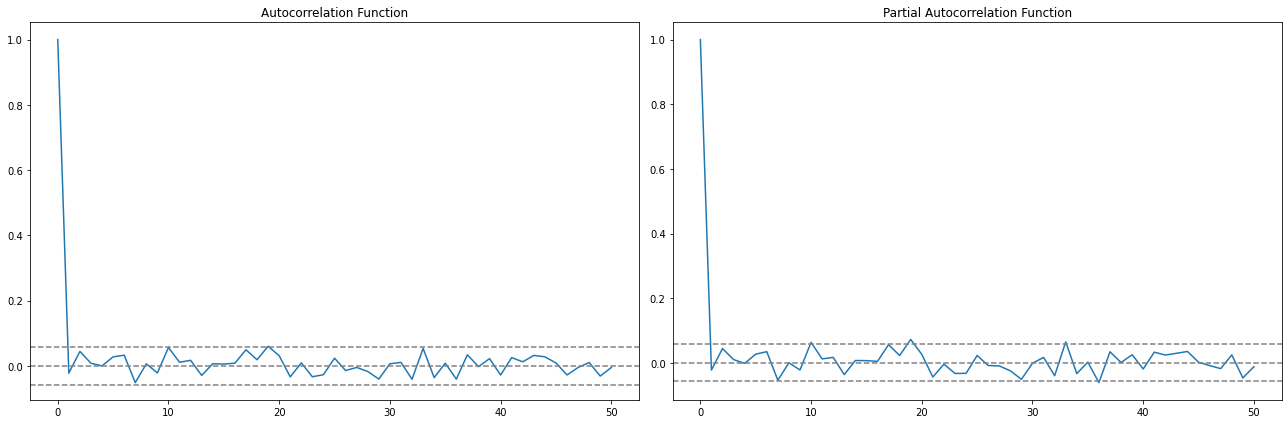

In [20]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=50)
lag_pacf = pacf(datasetLogDiffShifting, nlags=50, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### ARIMA (Autoregressive integrated moving average) : 

ARIMA model is one of the best models to work with time series. It is basically the combination of two models AR (autoregressive) and MA (moving average) binded together by the integration part (I). AR is the correlation betwwen the previous time period to the current. The three components of model are denoted as P i.e the auto regressive lags, Q i.e the moving average and d i.e the order of differentiation. To predict the value of P, PACF i.e partial auto correlation graph is used, to predict the value of Q, ACF i.e auto correlation graph is used and the value of D is the order in which we differentiate.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


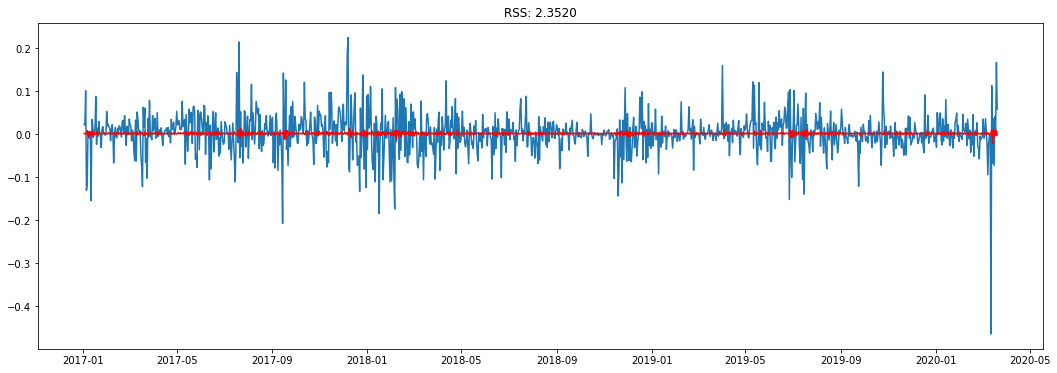

In [21]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexedDataset_logScale, order=(3, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting["Close"])**2))
print('Plotting AR model')

    

    *   converting the fitted values in series format
    *   printing the head of the above series



In [22]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2017-01-02    0.001608
2017-01-03    0.001134
2017-01-04    0.002107
2017-01-05    0.000425
2017-01-06    0.008228
dtype: float64


    
    *   calculating the cumulative sum of the fitted values
    *   printing the head



In [23]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2017-01-02    0.001608
2017-01-03    0.002742
2017-01-04    0.004849
2017-01-05    0.005274
2017-01-06    0.013502
dtype: float64




    *   prediction for the fitted value
    *   printing the head


In [24]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Close'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2017-01-01    6.906079
2017-01-02    6.907687
2017-01-03    6.908821
2017-01-04    6.910928
2017-01-05    6.911353
dtype: float64

    *   transforming back the data from log scale to the original scale
    *   plotting the graph with actual values and how the model fitted


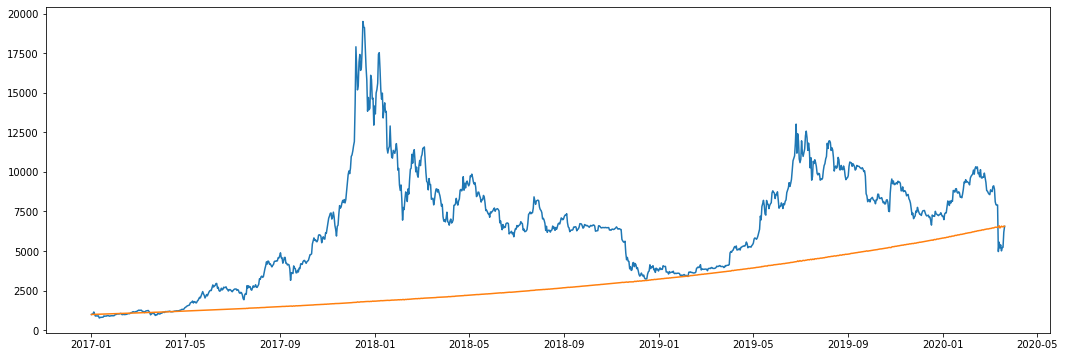

In [25]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [26]:
indexedDataset_logScale

,Close
Date,
2017-01-01,6.906079
2017-01-02,6.929272
2017-01-03,6.950661
2017-01-04,7.051622
2017-01-05,6.921047
...,...
2020-03-16,8.520085
2020-03-17,8.561331
2020-03-18,8.563779




    *   from above we can see our dataset has 1175 rows so it has 1175 values and i want to predict for the next one year so the number of data points the time series will be for is 1540 and here 10 is the starting index 
    *   we can use the forecast function to forecast in the next number of steps



Text(0, 0.5, 'price in USD / 1000')

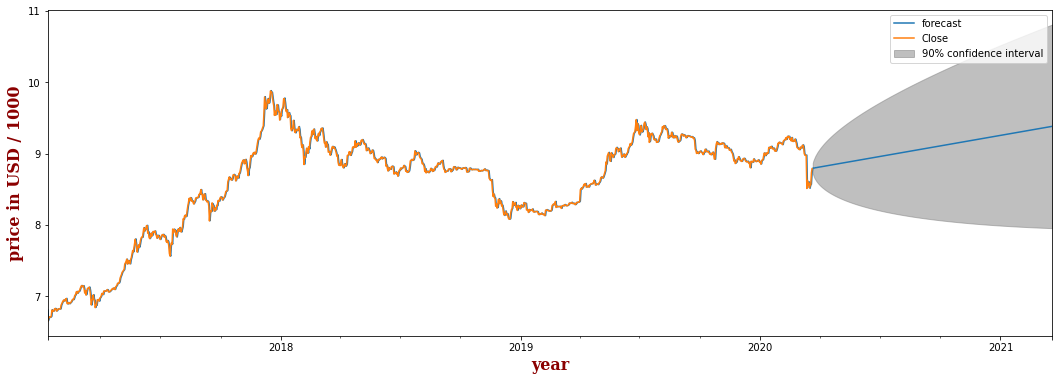

In [27]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }
results_AR.plot_predict(10, 1540, alpha=0.1)
plt.xlabel('year', fontdict=font)
plt.ylabel('price in USD / 1000', fontdict=font)

    forecast value for the next thirty steps thats the next month form 20-03-2020

In [28]:
results_AR.forecast(steps=30)

(array([8.79308658, 8.79932369, 8.79779284, 8.79863426, 8.80240348,
        8.80322037, 8.80408191, 8.80654544, 8.80808459, 8.80926004,
        8.81114921, 8.81283796, 8.81424593, 8.81592206, 8.81760231,
        8.81913247, 8.82074465, 8.82239348, 8.82397652, 8.82557632,
        8.82720297, 8.8288053 , 8.83040649, 8.83202172, 8.83362969,
        8.835234  , 8.83684437, 8.83845335, 8.84005978, 8.8416684 ]),
 array([0.04475899, 0.06264471, 0.0776123 , 0.09013855, 0.10063401,
        0.11037997, 0.11943324, 0.12767639, 0.13546017, 0.14288226,
        0.14988353, 0.15656988, 0.1630106 , 0.16919204, 0.17514863,
        0.18092028, 0.18651092, 0.19193439, 0.19721247, 0.20235319,
        0.20736442, 0.21225838, 0.21704257, 0.22172272, 0.22630626,
        0.23079915, 0.23520595, 0.23953166, 0.24378079, 0.24795704]),
 array([[8.70536057, 8.88081259],
        [8.67654231, 8.92210507],
        [8.64567552, 8.94991016],
        [8.62196595, 8.97530257],
        [8.60516444, 8.99964252],
        [8